<a href="https://colab.research.google.com/github/AliSajadian/RNN_weather_forecast/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
zip_path = tf.keras.utils.get_file(
    fname='jena_climate_2009_2016.csv.zip',
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 2s 0us/step


In [3]:
df = pd.read_csv(csv_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
df.shape

(420551, 15)

In [5]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


In [6]:
df = df[5::6]
df.shape

(70091, 15)

In [7]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:7]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8


<Axes: xlabel='Date Time'>

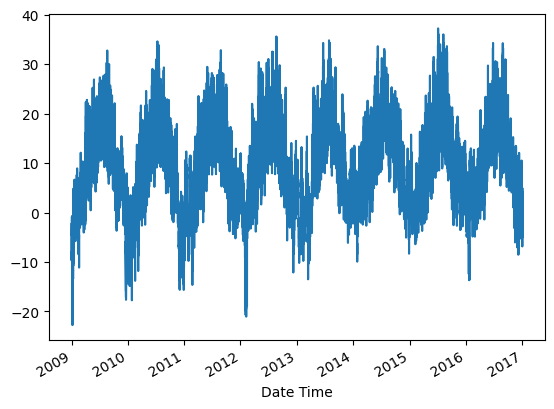

In [9]:
tmp = df['T (degC)']
tmp.plot()

In [ ]:
# [[[1],[2],[3],[4],[5]]] [6]
# [[[2],[3],[4],[5],[6]]] [7]
# [[[3],[4],[5],[6],[7]]] [8]

In [10]:
def def_to_x_y(df, window_size=5):
    df_as_np = df.to_numpy()
    x = []
    y = []
    for i in range(len(df_as_np)-window_size):
      row = [[a] for a in df_as_np[i:i+window_size]]
      x.append(row)
      label = df_as_np[i+window_size]
      y.append(label)
    return np.array(x), np.array(y)


In [13]:
window_size = 5
x, y = def_to_x_y(tmp, window_size)
x.shape, y.shape

((70086, 5, 1), (70086,))

In [16]:
x_train, y_train = x[:60000], y[:60000]
x_val, y_val = x[60000:65000], y[60000:65000]
x_test, y_test = x[65000:], y[65000:]
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((5, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
cp = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [21]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 41.4154 - root_mean_squared_error: 6.4355 - val_loss: 1.3888 - val_root_mean_squared_error: 1.1785
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.6057 - root_mean_squared_error: 1.6142 - val_loss: 0.6117 - val_root_mean_squared_error: 0.7821
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.9806 - root_mean_squared_error: 0.9902 - val_loss: 0.5354 - val_root_mean_squared_error: 0.7317
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7403 - root_mean_squared_error: 0.8604 - val_loss: 0.5109 - val_root_mean_squared_error: 0.7148
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6853 - root_mean_squared_error: 0.8278 - val_loss: 0.5026 - val_root_mean_squared_error: 0.7090
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6679 - root_mean_squared_error: 0.8173 - val_

In [22]:
from tensorflow.keras.models import load_model
model = load_model('model/')

In [24]:
train_predtions = model.predict(x_train).flatten()
train_results = pd.DataFrame(data={'train predictions': train_predtions, 'actuals': y_train})
train_results

1875/1875 [==============================] - 4s 2ms/step


,train predictions,actuals
0,-9.841723,-9.67
1,-9.625435,-9.17
2,-8.712086,-8.10
3,-7.245200,-7.66
4,-7.150249,-7.04
...,...,...
59995,5.967173,6.07
59996,7.045712,9.88
59997,12.258759,13.53
59998,15.945086,15.43


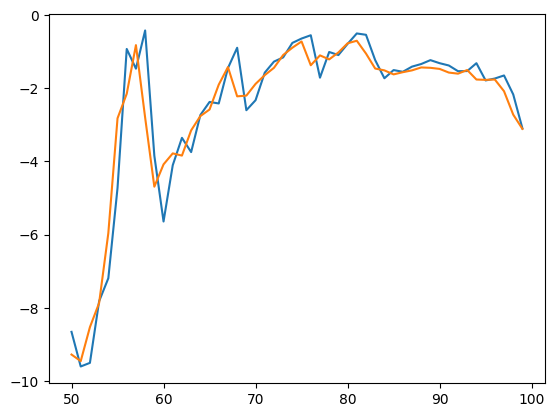

In [28]:
import matplotlib.pyplot as plt
plt.plot(train_results['train predictions'][50:100])
plt.plot(train_results['actuals'][50:100])`

In [29]:
val_predtions = model.predict(x_val).flatten()
val_results = pd.DataFrame(data={'val predictions': val_predtions, 'actuals': y_val})
val_results

157/157 [==============================] - 1s 2ms/step


,val predictions,actuals
0,15.410565,14.02
1,13.244995,13.67
2,12.974998,12.27
3,11.417907,11.19
4,10.291452,10.85
...,...,...
4995,17.300091,18.27
4996,17.258150,17.85
4997,17.129200,16.65
4998,15.787584,15.85


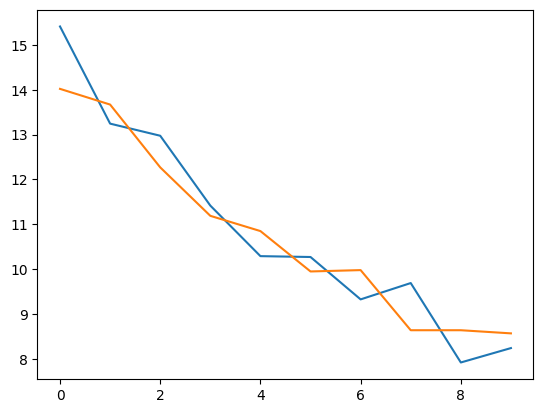

In [33]:
plt.plot(val_results['val predictions'][:10])
plt.plot(val_results['actuals'][:10])

In [34]:
test_predtions = model.predict(x_test).flatten()
test_results = pd.DataFrame(data={'test predictions': test_predtions, 'actuals': y_test})
test_results

159/159 [==============================] - 0s 2ms/step


,test predictions,actuals
0,14.324845,13.99
1,13.164970,13.46
2,12.774278,12.93
3,12.370272,12.43
4,11.919745,12.17
...,...,...
5081,-1.320454,-0.98
5082,-1.591102,-1.40
5083,-1.724634,-2.75
5084,-3.275297,-2.89


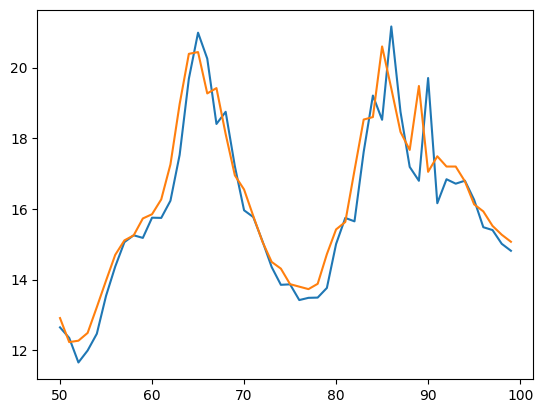

In [37]:
plt.plot(test_results['test predictions'][50:100])
plt.plot(test_results['actuals'][50:100])